In [355]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import keras
from keras.models import *
from keras.layers import *
from keras import backend as K
import tensorflow as tf
from keras import losses
import matplotlib.pyplot as plt
import seaborn as sns

In [356]:
x_test = np.arange(0.0,1.0,0.01)
BC_test = np.zeros(100)

In [357]:
init = keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)

def grad( y, x , nameit):
    return Lambda( lambda z: K.gradients( z[ 0 ], z[ 1 ] ), output_shape = [1], name = nameit)( [ y, x ] )

def network( i ):
    m = Dense(10000, activation='sigmoid', kernel_initializer=init)(i)
    j = Dense(1, name="functionvalue", activation='sigmoid',kernel_initializer=init)(m)
    return j

x = Input(shape=(1,))
BC = Input(shape=(1,))

# predicting network
a = network(x)

# create LHS
b = grad( a, x , "dudx1")
c = grad( b, x , "dudx11")
LHS = Lambda(lambda x: x + 1.0) (c)

# create final output neuron
g = Multiply()([BC,a])
h = Multiply()([BC,LHS])
i = Add()([g,LHS])
j = Subtract(name = "Output")([i,h])


model = Model( inputs = [ x, BC], outputs = [a,LHS,j] )
pre_ans = model.predict( [x_test, BC_test], steps = 1 )

In [364]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_96 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
dense_47 (Dense)                (None, 10000)        20000       input_96[0][0]                   
__________________________________________________________________________________________________
functionvalue (Dense)           (None, 1)            10001       dense_47[0][0]                   
__________________________________________________________________________________________________
dudx1 (Lambda)                  (None, 1)            0           functionvalue[0][0]              
                                                                 input_96[0][0]                   
__________

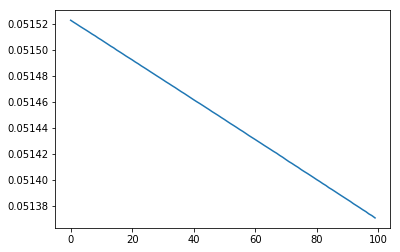

In [358]:
u = pre_ans[0]
grad = pre_ans[1]

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

plt.plot(u)

In [359]:
losses = {
	"Output": "mean_squared_error",
}

model.compile(loss=losses, optimizer="Adam", metrics=['accuracy'])

C:\Users\Freek\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Output "functionvalue" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "functionvalue" during training.
  """
C:\Users\Freek\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Output "lambda_29" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "lambda_29" during training.
  """


In [360]:
import math

# create interior points and boundary points to train on.
nexamples = 10000

#hyperparameters:
theta = 0.5 #theta proportion of interior points, (1-theta) proportion of boundary points.

#interior:
x_interior = np.random.random((math.floor(nexamples*theta), 1))
BC_interior = np.zeros((math.floor(nexamples*theta),1), dtype=int)
labels_interior = np.zeros((math.floor(nexamples*theta),1))

#bc: on a line are just the extremeties
x_bc = np.zeros((math.floor(nexamples*(1-theta)),1))
labels_bc = np.ones((math.floor(nexamples*(1-theta)),1))
BC_bc = np.ones((math.floor(nexamples*(1-theta)),1), dtype=int)

#concatenate to one dataset:
x=np.concatenate((x_interior, x_bc), axis=0)
BC=np.concatenate((BC_interior, BC_bc), axis=0)
labels=np.concatenate((labels_interior, labels_bc), axis=0)
model.fit([x,BC],labels,epochs=5, batch_size=100, shuffle=True)

Epoch 1/5
10000/10000 [==============================] - 4s 386us/step - loss: 0.5044 - Output_loss: 0.5044 - Output_acc: 0.4956
Epoch 2/5
10000/10000 [==============================] - 3s 257us/step - loss: 0.5000 - Output_loss: 0.5000 - Output_acc: 0.5000
Epoch 3/5
10000/10000 [==============================] - 3s 259us/step - loss: 0.5000 - Output_loss: 0.5000 - Output_acc: 0.5000
Epoch 4/5
10000/10000 [==============================] - 3s 260us/step - loss: 0.5000 - Output_loss: 0.5000 - Output_acc: 0.5000
Epoch 5/5
10000/10000 [==============================] - 3s 263us/step - loss: 0.5000 - Output_loss: 0.5000 - Output_acc: 0.5000


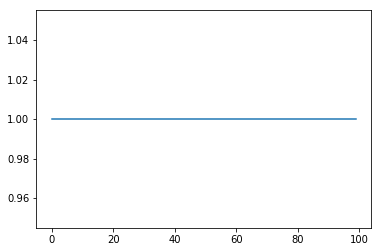

In [361]:
post_ans = model.predict( [x_test, BC_test], steps = 1 )
u = post_ans[0]
grad = post_ans[1]

plt.plot(grad)

In [363]:
u

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],